<a href="https://colab.research.google.com/github/sakarimov/my_learning_logs/blob/main/basic-machine-learning/Supervised_ML_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Basic_Machine_Learning/Salary_Data.csv')


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [7]:
data.head()

YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

In [8]:
import numpy as np

X = data['YearsExperience']
y = data['Salary']

X = X[:,np.newaxis]

<ipython-input-8-57628b0d9aaf>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = X[:,np.newaxis]


In [9]:
from sklearn.svm import SVR

model = SVR(C=1000, gamma=0.05, kernel='rbf')

model.fit(X,y)

SVR(C=1000, gamma=0.05)

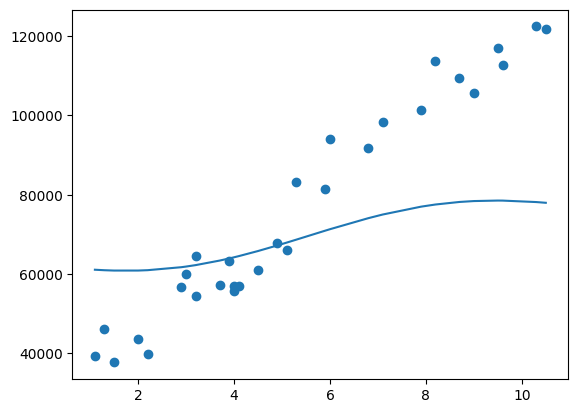

In [13]:
import matplotlib.pyplot as plt

plt.scatter(X,y)
plt.plot(X, model.predict(X))

# **tweaking model with Grid Search**

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

model = SVR()
parameters = {
    'kernel': ['rbf'],
    'C': [1000,10000,100000],
    'gamma': [0.5,0.05,0.005],
}

grid_search = GridSearchCV(model,parameters)

grid_search.fit(X, y)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1000, 10000, 100000],
                         'gamma': [0.5, 0.05, 0.005], 'kernel': ['rbf']})

In [19]:
print(grid_search.best_params_)

{'C': 100000, 'gamma': 0.005, 'kernel': 'rbf'}


In [20]:
model_baru = SVR(C=100000, gamma=0.005, kernel='rbf')
model_baru.fit(X, y)

SVR(C=100000, gamma=0.005)

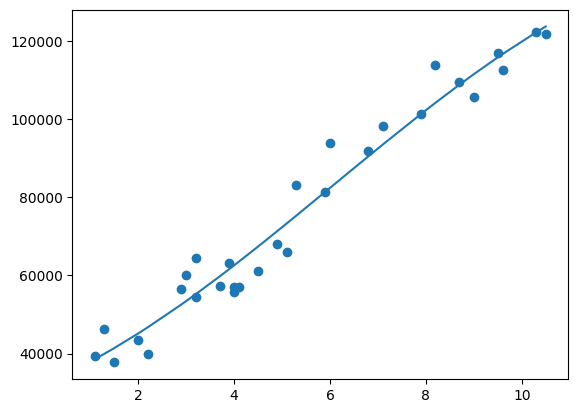

In [21]:
import matplotlib.pyplot as plt

plt.scatter(X,y)
plt.plot(X,model_baru.predict(X))